In [193]:
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

np.set_printoptions(precision=3)

In [194]:
# read and merge all xz in the data directory in one single DataFrame
data_dir='C:\\Users\\laurent.cohen\\Dropbox (PICNIC Lab)\\manips en cours\\new_hierarchy\\giga_stats\\'

list_of_csv=glob.glob(data_dir + '\\set_*.gz')

a=pd.DataFrame()

for x in list_of_csv:
    print(x)
    a = a.append(pd.read_csv(x, compression='gzip'), ignore_index=True)

C:\Users\laurent.cohen\Dropbox (PICNIC Lab)\manips en cours\new_hierarchy\giga_stats\set_0001.csv.gz
C:\Users\laurent.cohen\Dropbox (PICNIC Lab)\manips en cours\new_hierarchy\giga_stats\set_0002.csv.gz
C:\Users\laurent.cohen\Dropbox (PICNIC Lab)\manips en cours\new_hierarchy\giga_stats\set_0003.csv.gz
C:\Users\laurent.cohen\Dropbox (PICNIC Lab)\manips en cours\new_hierarchy\giga_stats\set_0004.csv.gz
C:\Users\laurent.cohen\Dropbox (PICNIC Lab)\manips en cours\new_hierarchy\giga_stats\set_0005.csv.gz
C:\Users\laurent.cohen\Dropbox (PICNIC Lab)\manips en cours\new_hierarchy\giga_stats\set_0006.csv.gz
C:\Users\laurent.cohen\Dropbox (PICNIC Lab)\manips en cours\new_hierarchy\giga_stats\set_0007.csv.gz
C:\Users\laurent.cohen\Dropbox (PICNIC Lab)\manips en cours\new_hierarchy\giga_stats\set_0008.csv.gz
C:\Users\laurent.cohen\Dropbox (PICNIC Lab)\manips en cours\new_hierarchy\giga_stats\set_0009.csv.gz
C:\Users\laurent.cohen\Dropbox (PICNIC Lab)\manips en cours\new_hierarchy\giga_stats\set_00

In [195]:
# check columns, names, etc   
pd.set_option('display.max_columns', len(a.columns))
print('data have the following dimension:',str(a.shape))
# print(a.columns)

# to rename some columns
# a.rename(index=str, columns={"enquadrigram": "enquadrigrams"},inplace=True)
# print(a.columns)

# to remove all lines with at least one Nan
# a=a.dropna(axis=0, how='any')

# to replace all NaN with some value (eg mean freq of quadrigrams in strings whose none of the quadrigrams exist)
a=a.fillna(-6.2)
print(a.head())

data have the following dimension: (100000, 24)
   Unnamed: 0    item  frletters  frminletters  frmaxletters  frbigrams  \
0           0  snorgm  -1.388178      0.007297      0.085246  -2.801606   
1           1  iegora  -1.257879      0.007297      0.168383  -2.689755   
2           2  geshpo  -1.470730      0.007297      0.168383  -3.059975   
3           3  mdambi  -1.477387      0.008622      0.084296  -2.830541   
4           4  rxgete  -1.409120      0.003918      0.168383  -3.073625   

   frminbigrams  frmaxbigrams  frquadrigrams  frminquadrigrams  \
0      0.000092      0.009070      -5.964319               0.0   
1      0.000482      0.014020      -5.514687               0.0   
2      0.000062      0.021390      -6.200000               0.0   
3      0.000240      0.005263      -5.481680               0.0   
4      0.000019      0.020352      -5.921688               0.0   

   frmaxquadrigrams  frisword  frfreq  enletters  enminletters  enmaxletters  \
0      2.795059e-07     

In [196]:
#%% Compute means
# np.mean(a.frisword)  # proportion of words
# np.mean(np.isnan(a.frquadrigrams)) # proportion of items for which quadrigram is NaN (all freq to 0.0)  

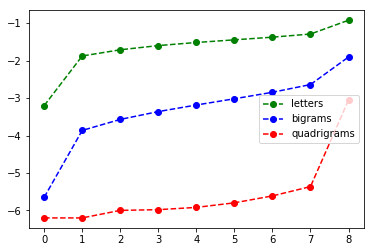

In [197]:
#%% Computation of quantiles
nb_of_quantiles=9 # equal to nb of bins - 1 (eg there are 9 deciles and not 10!)
bins_to_display=range(0,nb_of_quantiles) # all = range(0,nb_of_quantiles)
quantiles_frletters=np.quantile(a.frletters,  np.linspace(0, 1, nb_of_quantiles)) # quantiles of the distribution of frequencies of letters 
quantiles_frbigrams=np.quantile(a.frbigrams,  np.linspace(0, 1, nb_of_quantiles)) # quantiles of the distribution of frequencies of bigrams
quantiles_frquadrigrams=np.quantile(a.frquadrigrams,  np.linspace(0, 1, nb_of_quantiles)) # quantiles of the distribution of frequencies of bigrams

letters, = plt.plot(quantiles_frletters[bins_to_display], label='letters', color='green', marker='o',linestyle='dashed')
bigrams, = plt.plot(quantiles_frbigrams[bins_to_display], label='bigrams', color='blue', marker='o',linestyle='dashed')
quadrigrams, = plt.plot(quantiles_frquadrigrams[bins_to_display], label='quadrigrams', color='red', marker='o',linestyle='dashed')
plt.legend(handles=[letters, bigrams, quadrigrams])

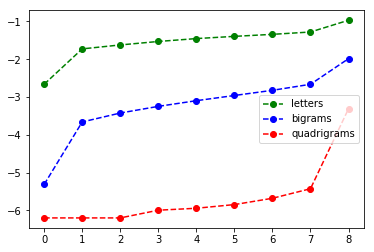

In [198]:
quantiles_enletters=np.quantile(a.enletters,  np.linspace(0, 1, nb_of_quantiles)) # quantiles of the distribution of frequencies of letters 
quantiles_enbigrams=np.quantile(a.enbigrams,  np.linspace(0, 1, nb_of_quantiles)) # quantiles of the distribution of frequencies of bigrams
quantiles_enquadrigrams=np.quantile(a.enquadrigrams,  np.linspace(0, 1, nb_of_quantiles)) # quantiles of the distribution of frequencies of bigrams

letters, = plt.plot(quantiles_enletters[bins_to_display], label='letters', color='green', marker='o',linestyle='dashed')
bigrams, = plt.plot(quantiles_enbigrams[bins_to_display], label='bigrams', color='blue', marker='o',linestyle='dashed')
quadrigrams, = plt.plot(quantiles_enquadrigrams[bins_to_display], label='quadrigrams', color='red', marker='o',linestyle='dashed')
plt.legend(handles=[letters, bigrams, quadrigrams])

In [199]:
# print("Quantiles")
print("fr letters    ",quantiles_frletters)
print("fr bigrams    ",quantiles_frbigrams)
print("fr quadrigrams",quantiles_frquadrigrams)
print()
print("en letters    ",quantiles_enletters)
print("en bigrams    ",quantiles_enbigrams)
print("en quadrigrams",quantiles_enquadrigrams)


fr letters     [-3.202 -1.877 -1.711 -1.599 -1.516 -1.445 -1.374 -1.291 -0.922]
fr bigrams     [-5.65  -3.864 -3.57  -3.361 -3.185 -3.019 -2.846 -2.64  -1.904]
fr quadrigrams [-6.2   -6.2   -5.999 -5.98  -5.919 -5.797 -5.612 -5.364 -3.053]

en letters     [-2.662 -1.726 -1.621 -1.529 -1.453 -1.394 -1.341 -1.279 -0.968]
en bigrams     [-5.314 -3.66  -3.424 -3.247 -3.097 -2.96  -2.822 -2.663 -1.985]
en quadrigrams [-6.2   -6.2   -6.2   -5.996 -5.944 -5.847 -5.68  -5.428 -3.31 ]


In [200]:
#%% select a subset of lines to work on
# criterion = (a.item == a.item) # keep everything
criterion = np.logical_and(1-a.frisword,1-a.enisword) # exclude real words of either language
a=a[criterion]
all_data = (a.item == a.item) # keep everything
print(len(a.item[all_data]))

99946


In [201]:
def single_distrib ( criterion ):
    sns.distplot(a.frletters[criterion], bins=30, kde=False);
    sns.distplot(a.frbigrams[criterion], bins=30, kde=False);
    sns.distplot(a.frquadrigrams[criterion], bins=30, kde=False);

    sns.distplot(a.enletters[criterion], bins=30, kde=False);
    sns.distplot(a.enbigrams[criterion], bins=30, kde=False);
    sns.distplot(a.enquadrigrams[criterion], bins=30, kde=False);
    
    return

In [202]:
def double_distrib ( criterion ):
    g = sns.jointplot(a.frletters[criterion], a.enletters[criterion], kind="hex", color="g", marginal_kws=dict(bins=15),
                  joint_kws=dict(gridsize=15), ylim=(-2.5,-0.75), xlim=(-3,-0.5));
    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')    

    g = sns.jointplot(a.frbigrams[criterion], a.enbigrams[criterion], kind="hex", color="b", marginal_kws=dict(bins=15),
                  joint_kws=dict(gridsize=15)); # , ylim=(-4,-1.5), xlim=(-4,-1.5)
    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')    

    g = sns.jointplot(a.frquadrigrams[criterion], a.enquadrigrams[criterion], kind="hex", color="r", marginal_kws=dict(bins=25),
                  joint_kws=dict(gridsize=25), ylim=(-7.5,-4), xlim=(-7.5,-4));
    x0, x1 = g.ax_joint.get_xlim()
    y0, y1 = g.ax_joint.get_ylim()
    lims = [max(x0, y0), min(x1, y1)]
    g.ax_joint.plot(lims, lims, ':k')    

    return

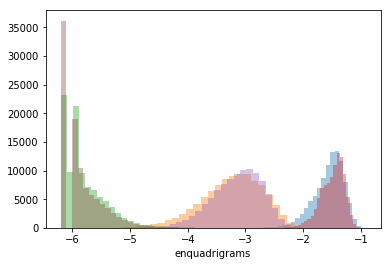

In [203]:
single_distrib(all_data)

C:\Users\laurent.cohen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


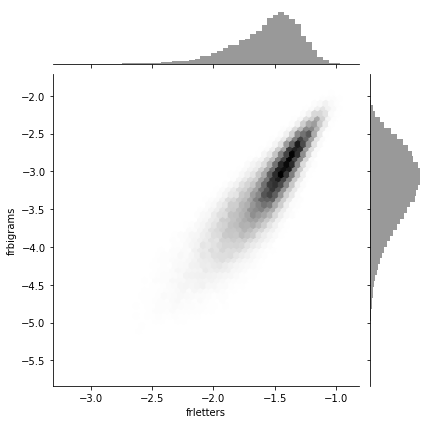

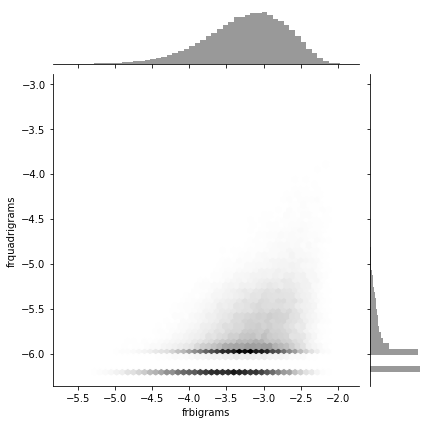

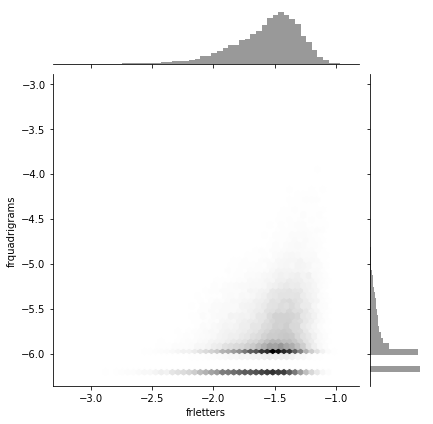

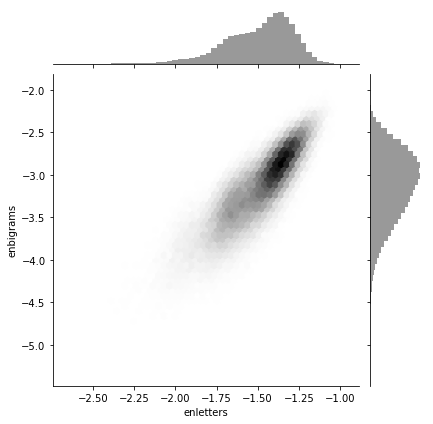

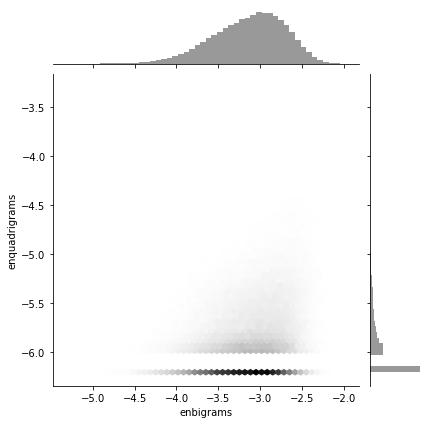

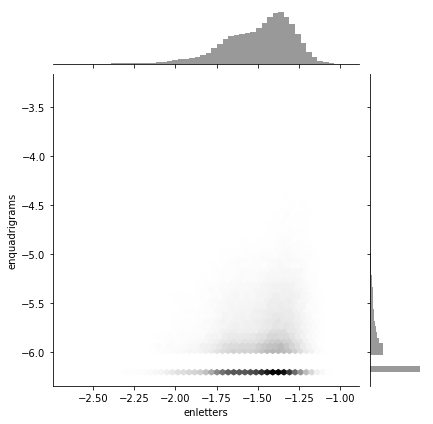

In [204]:
#%% Distribution 2 variables within language
sns.jointplot(a.frletters[criterion], a.frbigrams[criterion], kind="hex", color="k");
sns.jointplot(a.frbigrams[criterion], a.frquadrigrams[criterion], kind="hex", color="k");
sns.jointplot(a.frletters[criterion], a.frquadrigrams[criterion], kind="hex", color="k");

sns.jointplot(a.enletters[criterion], a.enbigrams[criterion], kind="hex", color="k");
sns.jointplot(a.enbigrams[criterion], a.enquadrigrams[criterion], kind="hex", color="k");
sns.jointplot(a.enletters[criterion], a.enquadrigrams[criterion], kind="hex", color="k");

C:\Users\laurent.cohen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


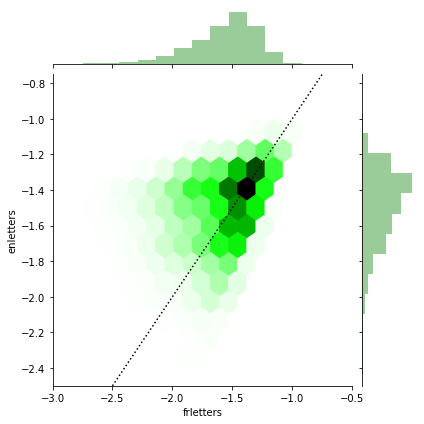

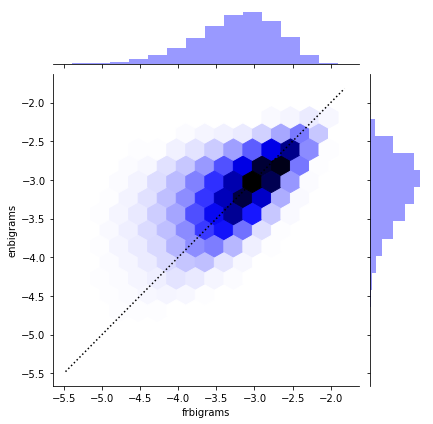

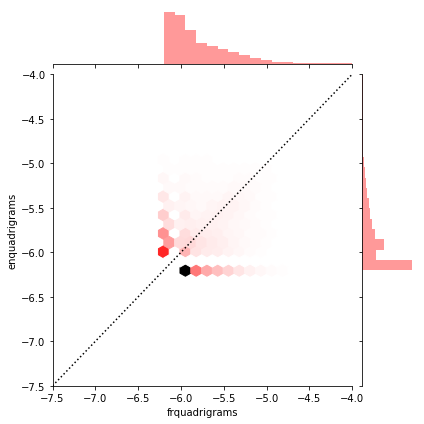

In [205]:
double_distrib(all_data)

In [206]:
# split according to QG frequency, forbidding overlapping QG frequency (ALL QG are below or above cutoff)
cutoff=0.000015
quad_lf_fr=(a.frmaxquadrigrams < cutoff)
quad_hf_fr=(a.frminquadrigrams > cutoff)
quad_lf_en=(a.enmaxquadrigrams < cutoff)
quad_hf_en=(a.enminquadrigrams > cutoff)
quad_lf_fr_lf_en=np.logical_and(quad_lf_fr,quad_lf_en)
quad_lf_fr_hf_en=np.logical_and(quad_lf_fr,quad_hf_en)
quad_hf_fr_lf_en=np.logical_and(quad_hf_fr,quad_lf_en)
quad_hf_fr_hf_en=np.logical_and(quad_hf_fr,quad_hf_en)
print("quad_lf_fr_lf_en", sum(quad_lf_fr_lf_en==1))
print("quad_lf_fr_hf_en", sum(quad_lf_fr_hf_en==1))
print("quad_hf_fr_lf_en", sum(quad_hf_fr_lf_en==1))
print("quad_hf_fr_hf_en", sum(quad_hf_fr_hf_en==1))

quad_lf_fr_lf_en 67611
quad_lf_fr_hf_en 9
quad_hf_fr_lf_en 45
quad_hf_fr_hf_en 22


Text(0,0.5,'English mean freq QG')

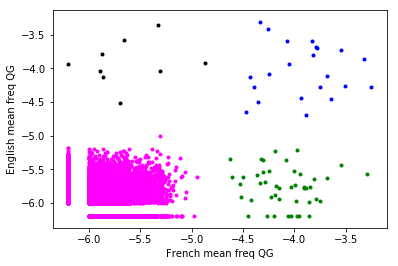

In [207]:
# plot the mean freq for the different sets of items
plt.scatter(a.frquadrigrams[quad_lf_fr_lf_en], a.enquadrigrams[quad_lf_fr_lf_en], marker='.', color="magenta")
plt.scatter(a.frquadrigrams[quad_lf_fr_hf_en], a.enquadrigrams[quad_lf_fr_hf_en], marker='.', color="black")
plt.scatter(a.frquadrigrams[quad_hf_fr_lf_en], a.enquadrigrams[quad_hf_fr_lf_en], marker='.', color="g")
plt.scatter(a.frquadrigrams[quad_hf_fr_hf_en], a.enquadrigrams[quad_hf_fr_hf_en], marker='.', color="b")
plt.xlabel("French mean freq QG")
plt.ylabel("English mean freq QG")

In [208]:
# rectification pour que les items avec QG rares en 2 langues n'utilisent pas de BG trop rares
# quad_lf_fr_lf_en=np.logical_and(quad_lf_fr_lf_en,np.logical_and((a.enbigrams > -3.5), (a.frbigrams > -3.5)))

In [209]:
print(sum(quad_lf_fr_lf_en))

67611


C:\Users\laurent.cohen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


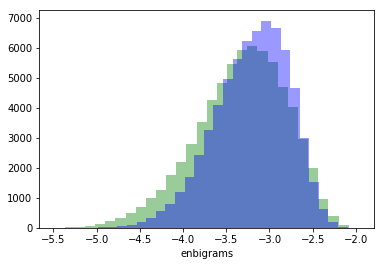

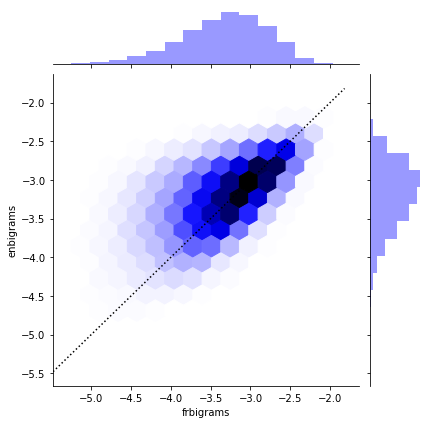

In [210]:
# then we focus on the lflf QG set and plot mean bigram freq
criterion=quad_lf_fr_lf_en
sns.distplot(a.frbigrams[criterion], bins=30, kde=False, color="g");
sns.distplot(a.enbigrams[criterion], bins=30, kde=False, color="b");

g = sns.jointplot(a.frbigrams[criterion], a.enbigrams[criterion], kind="hex", color="b", marginal_kws=dict(bins=15),
              joint_kws=dict(gridsize=15)); # , ylim=(-4,-1.5), xlim=(-4,-1.5)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')    

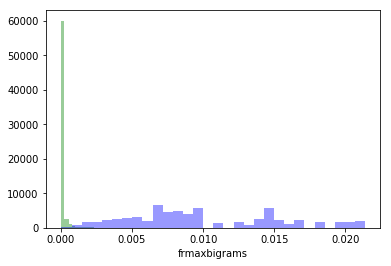

In [211]:
# as well as min max BG freq
sns.distplot(a.frminbigrams[quad_lf_fr_lf_en], bins=30, kde=False, color="g");
sns.distplot(a.frmaxbigrams[quad_lf_fr_lf_en], bins=30, kde=False, color="b");

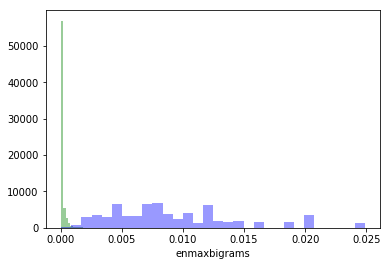

In [212]:
sns.distplot(a.enminbigrams[quad_lf_fr_lf_en], bins=30, kde=False, color="g");
sns.distplot(a.enmaxbigrams[quad_lf_fr_lf_en], bins=30, kde=False, color="b");

In [213]:
# try to identify subsets with disjoint BG freq between languages
bg_cutoff=0.001
bg_lf_fr=np.logical_and((a.frmaxbigrams < bg_cutoff),quad_lf_fr_lf_en)
bg_hf_fr=np.logical_and((a.frminbigrams > bg_cutoff),quad_lf_fr_lf_en)
bg_lf_en=np.logical_and((a.enmaxbigrams < bg_cutoff),quad_lf_fr_lf_en)
bg_hf_en=np.logical_and((a.enminbigrams > bg_cutoff),quad_lf_fr_lf_en)
bg_lf_fr_lf_en=np.logical_and(bg_lf_fr,bg_lf_en)
bg_lf_fr_hf_en=np.logical_and(bg_lf_fr,bg_hf_en)
bg_hf_fr_lf_en=np.logical_and(bg_hf_fr,bg_lf_en)
bg_hf_fr_hf_en=np.logical_and(bg_hf_fr,bg_hf_en)
print("bg_lf_fr_lf_en", sum(bg_lf_fr_lf_en==1))
print("bg_lf_fr_hf_en", sum(bg_lf_fr_hf_en==1))
print("bg_hf_fr_lf_en", sum(bg_hf_fr_lf_en==1))
print("bg_hf_fr_hf_en", sum(bg_hf_fr_hf_en==1))

bg_lf_fr_lf_en 68
bg_lf_fr_hf_en 0
bg_hf_fr_lf_en 0
bg_hf_fr_hf_en 168


In [214]:
#does not seem to work, with various cutoff values
# try with means

In [215]:
# try to identify subsets with different mean BG freq X languages
bg_cutoff=-3.2
bg_lf_fr=np.logical_and((a.frbigrams < bg_cutoff),quad_lf_fr_lf_en)
bg_hf_fr=np.logical_and((a.frbigrams > bg_cutoff),quad_lf_fr_lf_en)
bg_lf_en=np.logical_and((a.enbigrams < bg_cutoff),quad_lf_fr_lf_en)
bg_hf_en=np.logical_and((a.enbigrams > bg_cutoff),quad_lf_fr_lf_en)
bg_lf_fr_lf_en=np.logical_and(bg_lf_fr,bg_lf_en)
bg_lf_fr_hf_en=np.logical_and(bg_lf_fr,bg_hf_en)
bg_hf_fr_lf_en=np.logical_and(bg_hf_fr,bg_lf_en)
bg_hf_fr_hf_en=np.logical_and(bg_hf_fr,bg_hf_en)
print("bg_lf_fr_lf_en", sum(bg_lf_fr_lf_en==1))
print("bg_lf_fr_hf_en", sum(bg_lf_fr_hf_en==1))
print("bg_hf_fr_lf_en", sum(bg_hf_fr_lf_en==1))
print("bg_hf_fr_hf_en", sum(bg_hf_fr_hf_en==1))

bg_lf_fr_lf_en 25463
bg_lf_fr_hf_en 12328
bg_hf_fr_lf_en 6364
bg_hf_fr_hf_en 23456


In [216]:
# try to identify subsets with different mean BG freq X languages
# increasing the distance between the means
bg_cutoff_h=-2.8
bg_cutoff_l=-3.5
bg_lf_fr=np.logical_and((a.frbigrams < bg_cutoff_l),quad_lf_fr_lf_en)
bg_hf_fr=np.logical_and((a.frbigrams > bg_cutoff_h),quad_lf_fr_lf_en)
bg_lf_en=np.logical_and((a.enbigrams < bg_cutoff_l),quad_lf_fr_lf_en)
bg_hf_en=np.logical_and((a.enbigrams > bg_cutoff_h),quad_lf_fr_lf_en)
bg_lf_fr_lf_en=np.logical_and(bg_lf_fr,bg_lf_en)
bg_lf_fr_hf_en=np.logical_and(bg_lf_fr,bg_hf_en)
bg_hf_fr_lf_en=np.logical_and(bg_hf_fr,bg_lf_en)
bg_hf_fr_hf_en=np.logical_and(bg_hf_fr,bg_hf_en)
print("bg_lf_fr_lf_en", sum(bg_lf_fr_lf_en==1))
print("bg_lf_fr_hf_en", sum(bg_lf_fr_hf_en==1))
print("bg_hf_fr_lf_en", sum(bg_hf_fr_lf_en==1))
print("bg_hf_fr_hf_en", sum(bg_hf_fr_hf_en==1))

bg_lf_fr_lf_en 11133
bg_lf_fr_hf_en 1142
bg_hf_fr_lf_en 41
bg_hf_fr_hf_en 6112


Text(0,0.5,'English mean freq BG')

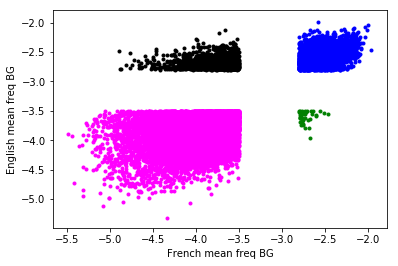

In [217]:
# plot the mean freq for the different sets of items
plt.scatter(a.frbigrams[bg_lf_fr_lf_en], a.enbigrams[bg_lf_fr_lf_en], marker='.', color="magenta")
plt.scatter(a.frbigrams[bg_lf_fr_hf_en], a.enbigrams[bg_lf_fr_hf_en], marker='.', color="black")
plt.scatter(a.frbigrams[bg_hf_fr_lf_en], a.enbigrams[bg_hf_fr_lf_en], marker='.', color="g")
plt.scatter(a.frbigrams[bg_hf_fr_hf_en], a.enbigrams[bg_hf_fr_hf_en], marker='.', color="b")
plt.xlabel("French mean freq BG")
plt.ylabel("English mean freq BG")

In [218]:
print("quad_lf_fr_lf_en", sum(quad_lf_fr_lf_en==1))
print("quad_lf_fr_hf_en", sum(quad_lf_fr_hf_en==1))
print("quad_hf_fr_lf_en", sum(quad_hf_fr_lf_en==1))
print("quad_hf_fr_hf_en", sum(quad_hf_fr_hf_en==1))
print()
print("bg_lf_fr_lf_en", sum(bg_lf_fr_lf_en==1))
print("bg_lf_fr_hf_en", sum(bg_lf_fr_hf_en==1))
print("bg_hf_fr_lf_en", sum(bg_hf_fr_lf_en==1))
print("bg_hf_fr_hf_en", sum(bg_hf_fr_hf_en==1))

quad_lf_fr_lf_en 67611
quad_lf_fr_hf_en 9
quad_hf_fr_lf_en 45
quad_hf_fr_hf_en 22

bg_lf_fr_lf_en 11133
bg_lf_fr_hf_en 1142
bg_hf_fr_lf_en 41
bg_hf_fr_hf_en 6112


In [219]:
print(a.item[quad_lf_fr_hf_en])

17101    mpussy
44544    freadl
50793    dishin
52231    meethe
62609    wentle
83675    elover
87963    weighl
93501    hrongs
98290    nswelc
Name: item, dtype: object


letters_lf_fr_lf_en 48
letters_lf_fr_hf_en 1175
letters_hf_fr_lf_en 310
letters_hf_fr_hf_en 5847


Text(0,0.5,'English mean freq letters')

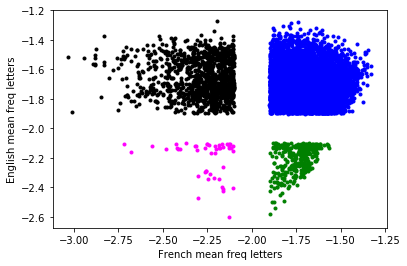

In [250]:
# try to identify subsets with different mean letter freq X languages
# increasing the distance between the means
letters_cutoff_h=-1.9
letters_cutoff_l=-2.1
letters_lf_fr=np.logical_and((a.frletters < letters_cutoff_l),bg_lf_fr_lf_en)
letters_hf_fr=np.logical_and((a.frletters > letters_cutoff_h),bg_lf_fr_lf_en)
letters_lf_en=np.logical_and((a.enletters < letters_cutoff_l),bg_lf_fr_lf_en)
letters_hf_en=np.logical_and((a.enletters > letters_cutoff_h),bg_lf_fr_lf_en)
letters_lf_fr_lf_en=np.logical_and(letters_lf_fr,letters_lf_en)
letters_lf_fr_hf_en=np.logical_and(letters_lf_fr,letters_hf_en)
letters_hf_fr_lf_en=np.logical_and(letters_hf_fr,letters_lf_en)
letters_hf_fr_hf_en=np.logical_and(letters_hf_fr,letters_hf_en)
print("letters_lf_fr_lf_en", sum(letters_lf_fr_lf_en==1))
print("letters_lf_fr_hf_en", sum(letters_lf_fr_hf_en==1))
print("letters_hf_fr_lf_en", sum(letters_hf_fr_lf_en==1))
print("letters_hf_fr_hf_en", sum(letters_hf_fr_hf_en==1))

# plot the mean freq for the different sets of items
plt.scatter(a.frletters[letters_lf_fr_lf_en], a.enletters[letters_lf_fr_lf_en], marker='.', color="magenta")
plt.scatter(a.frletters[letters_lf_fr_hf_en], a.enletters[letters_lf_fr_hf_en], marker='.', color="black")
plt.scatter(a.frletters[letters_hf_fr_lf_en], a.enletters[letters_hf_fr_lf_en], marker='.', color="g")
plt.scatter(a.frletters[letters_hf_fr_hf_en], a.enletters[letters_hf_fr_hf_en], marker='.', color="b")
plt.xlabel("French mean freq letters")
plt.ylabel("English mean freq letters")

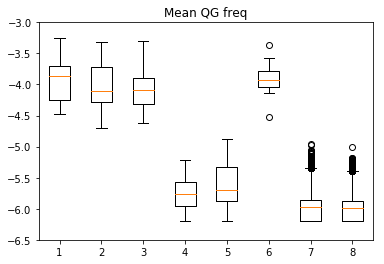

In [259]:
# Plot the mean properties of the 4 + 4 categories
data =  [a.frquadrigrams[quad_hf_fr_hf_en],
         a.enquadrigrams[quad_hf_fr_hf_en],
         a.frquadrigrams[quad_hf_fr_lf_en],
         a.enquadrigrams[quad_hf_fr_lf_en],
         a.frquadrigrams[quad_lf_fr_hf_en],
         a.enquadrigrams[quad_lf_fr_hf_en],
         a.frquadrigrams[quad_lf_fr_lf_en],
         a.enquadrigrams[quad_lf_fr_lf_en]]
fig, ax = plt.subplots()
ax.set_title('Mean QG freq')
ax.boxplot(data)

axes = plt.gca()
axes.set_ylim([-6.5,-3])

plt.show()

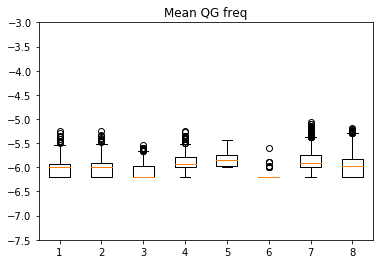

In [257]:
data =  [a.frquadrigrams[bg_lf_fr_lf_en],
         a.enquadrigrams[bg_lf_fr_lf_en],
         a.frquadrigrams[bg_lf_fr_hf_en],
         a.enquadrigrams[bg_lf_fr_hf_en],
         a.frquadrigrams[bg_hf_fr_lf_en],
         a.enquadrigrams[bg_hf_fr_lf_en],
         a.frquadrigrams[bg_hf_fr_hf_en],
         a.enquadrigrams[bg_hf_fr_hf_en]]


fig, ax = plt.subplots()
ax.set_title('Mean QG freq')
ax.boxplot(data)

axes = plt.gca()
axes.set_ylim([-6.5,-3])

plt.show()

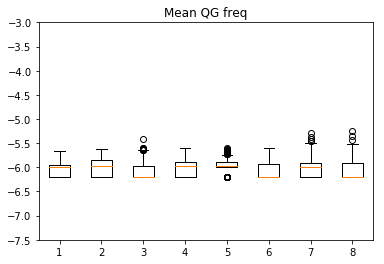

In [258]:
data =  [a.frquadrigrams[letters_lf_fr_lf_en],
         a.enquadrigrams[letters_lf_fr_lf_en],
         a.frquadrigrams[letters_lf_fr_hf_en],
         a.enquadrigrams[letters_lf_fr_hf_en],
         a.frquadrigrams[letters_hf_fr_lf_en],
         a.enquadrigrams[letters_hf_fr_lf_en],
         a.frquadrigrams[letters_hf_fr_hf_en],
         a.enquadrigrams[letters_hf_fr_hf_en]]


fig, ax = plt.subplots()
ax.set_title('Mean QG freq')
ax.boxplot(data)

axes = plt.gca()
axes.set_ylim([-6.5,-3])

plt.show()

In [222]:
#datata=np.array(data)

#stats.f_oneway(datata)


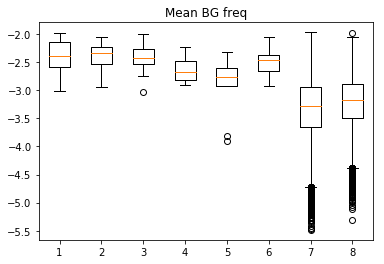

In [223]:
# Plot the mean properties of the 4 + 4 categories
data =  [a.frbigrams[quad_hf_fr_hf_en],
         a.enbigrams[quad_hf_fr_hf_en],
         a.frbigrams[quad_hf_fr_lf_en],
         a.enbigrams[quad_hf_fr_lf_en],
         a.frbigrams[quad_lf_fr_hf_en],
         a.enbigrams[quad_lf_fr_hf_en],
         a.frbigrams[quad_lf_fr_lf_en],
         a.enbigrams[quad_lf_fr_lf_en]]

fig, ax = plt.subplots()
ax.set_title('Mean BG freq')
ax.boxplot(data)

#axes = plt.gca()
#axes.set_ylim([-6.5,-3])

plt.show()

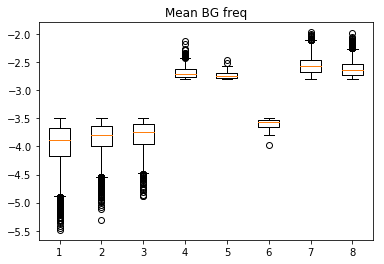

In [224]:
data =  [a.frbigrams[bg_lf_fr_lf_en],
         a.enbigrams[bg_lf_fr_lf_en],
         a.frbigrams[bg_lf_fr_hf_en],
         a.enbigrams[bg_lf_fr_hf_en],
         a.frbigrams[bg_hf_fr_lf_en],
         a.enbigrams[bg_hf_fr_lf_en],
         a.frbigrams[bg_hf_fr_hf_en],
         a.enbigrams[bg_hf_fr_hf_en]]

fig, ax = plt.subplots()
ax.set_title('Mean BG freq')
ax.boxplot(data)

#axes = plt.gca()
#axes.set_ylim([-6.5,-3])

plt.show()

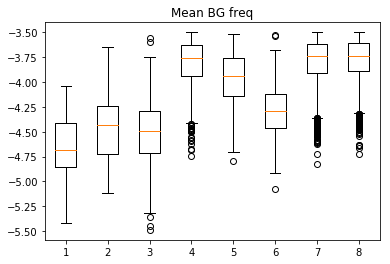

In [260]:
# here we see that bigrams are not decorrelated from letters...
data =  [a.frbigrams[letters_lf_fr_lf_en],
         a.enbigrams[letters_lf_fr_lf_en],
         a.frbigrams[letters_lf_fr_hf_en],
         a.enbigrams[letters_lf_fr_hf_en],
         a.frbigrams[letters_hf_fr_lf_en],
         a.enbigrams[letters_hf_fr_lf_en],
         a.frbigrams[letters_hf_fr_hf_en],
         a.enbigrams[letters_hf_fr_hf_en]]

fig, ax = plt.subplots()
ax.set_title('Mean BG freq')
ax.boxplot(data)

#axes = plt.gca()
#axes.set_ylim([-6.5,-3])

plt.show()

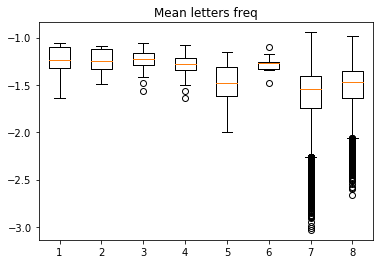

In [225]:
# Plot the mean properties of the 4 + 4 categories
data =  [a.frletters[quad_hf_fr_hf_en],
         a.enletters[quad_hf_fr_hf_en],
         a.frletters[quad_hf_fr_lf_en],
         a.enletters[quad_hf_fr_lf_en],
         a.frletters[quad_lf_fr_hf_en],
         a.enletters[quad_lf_fr_hf_en],
         a.frletters[quad_lf_fr_lf_en],
         a.enletters[quad_lf_fr_lf_en]]

fig, ax = plt.subplots()
ax.set_title('Mean letters freq')
ax.boxplot(data)

#axes = plt.gca()
#axes.set_ylim([-6.5,-3])

plt.show()

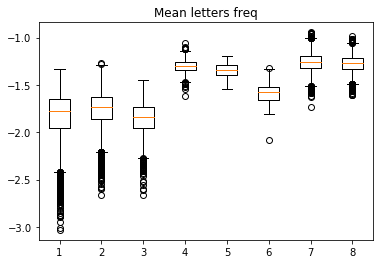

In [229]:
data =  [a.frletters[bg_lf_fr_lf_en],
         a.enletters[bg_lf_fr_lf_en],
         a.frletters[bg_lf_fr_hf_en],
         a.enletters[bg_lf_fr_hf_en],
         a.frletters[bg_hf_fr_lf_en],
         a.enletters[bg_hf_fr_lf_en],
         a.frletters[bg_hf_fr_hf_en],
         a.enletters[bg_hf_fr_hf_en]]

fig, ax = plt.subplots()
ax.set_title('Mean letters freq')
ax.boxplot(data)

#axes = plt.gca()
#axes.set_ylim([-6.5,-3])

plt.show()

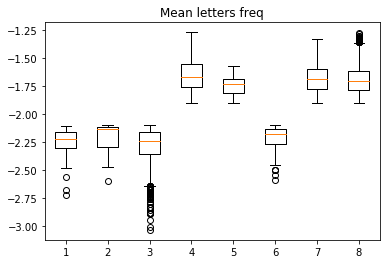

In [261]:
data =  [a.frletters[letters_lf_fr_lf_en],
         a.enletters[letters_lf_fr_lf_en],
         a.frletters[letters_lf_fr_hf_en],
         a.enletters[letters_lf_fr_hf_en],
         a.frletters[letters_hf_fr_lf_en],
         a.enletters[letters_hf_fr_lf_en],
         a.frletters[letters_hf_fr_hf_en],
         a.enletters[letters_hf_fr_hf_en]]

fig, ax = plt.subplots()
ax.set_title('Mean letters freq')
ax.boxplot(data)

#axes = plt.gca()
#axes.set_ylim([-6.5,-3])

plt.show()

In [227]:
#%%Selecting items
# aga=a.loc[a.string == "BATEAU"]

In [228]:
#%% Saving items to csv
# aga.to_csv("all_french_strings.csv")